In [44]:
import numpy as np
import pandas as pd
from dateutil import parser
from datetime import datetime, timedelta

In [68]:
sav2013_2017 = pd.read_csv('./data/sav2013-2017.csv', delimiter=';')

In [69]:
sav2013_2017.head()

,hour,sessions
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

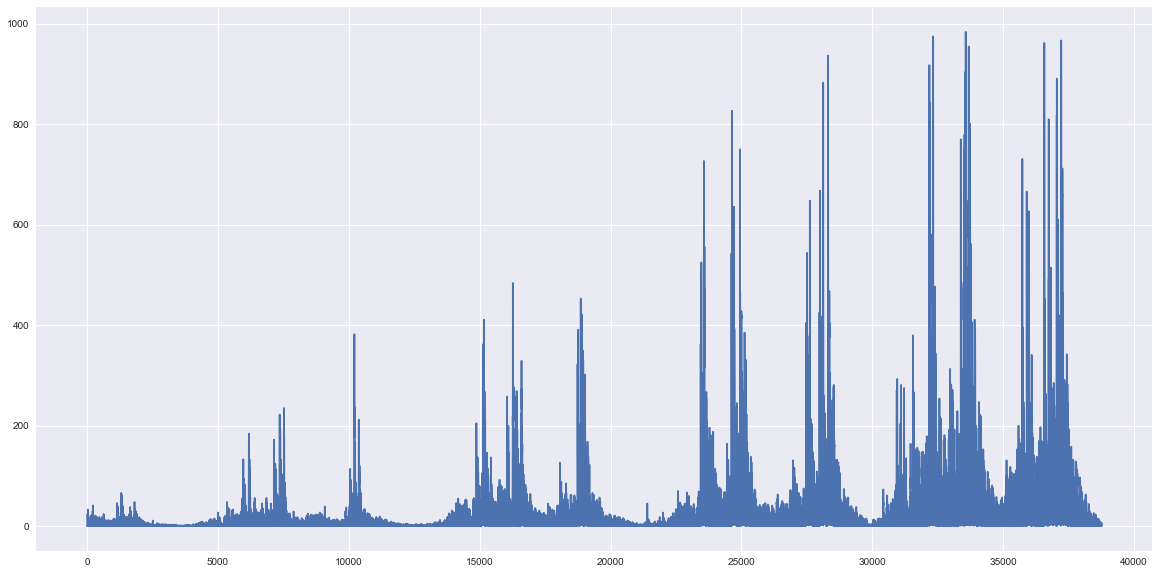

In [71]:
plt.figure(figsize=(20,10))
plt.plot(sav2013_2017.hour, sav2013_2017.sessions)
plt.show()

In [85]:
def get_sav_data(init_date, dataframe):
    data, count, dias_apos_prova, dias_enem = [], [], [], []
    
    entregas_provas = [parser.parse('2013-04-19 23:59:59.000'),
                       parser.parse('2013-06-24 23:59:59.000'),
                       parser.parse('2013-09-23 23:59:59.000'),
                       parser.parse('2014-04-14 23:59:59.000'),
                       parser.parse('2014-06-09 23:59:59.000'),
                       parser.parse('2014-09-29 23:59:59.000'),
                       parser.parse('2015-04-20 23:59:59.000'),
                       parser.parse('2015-06-22 23:59:59.000'),
                       parser.parse('2015-09-28 23:59:59.000'),
                       parser.parse('2016-04-08 23:59:59.000'),
                       parser.parse('2016-05-27 23:59:59.000'),
                       parser.parse('2016-09-23 23:59:59.000'),
                       parser.parse('2016-10-14 23:59:59.000'),
                       parser.parse('2017-04-07 17:06:53.233'),
                       parser.parse('2017-06-02 23:48:14.300'),
                       parser.parse('2017-09-06 20:20:32.017'),
                       parser.parse('2017-10-11 19:42:29.193'),
                       parser.parse('2017-10-11 19:42:45.233')]    

    datas_enem_nac = [parser.parse('2013-10-26 00:00:00.000'),
                      parser.parse('2013-10-27 00:00:00.000'),
                      parser.parse('2014-11-08 00:00:00.000'),
                      parser.parse('2014-11-09 00:00:00.000'),
                      parser.parse('2015-10-24 00:00:00.000'),
                      parser.parse('2015-10-25 00:00:00.000'),
                      parser.parse('2016-11-05 00:00:00.000'),
                      parser.parse('2016-11-06 00:00:00.000'),
                      parser.parse('2017-11-05 00:00:00.000'),
                      parser.parse('2017-11-12 00:00:00.000')]
    
    cur_date = init_date
    for row in dataframe.values:
        dias_val = 0
        for prova_date in entregas_provas:
            if (cur_date >= prova_date and cur_date <= prova_date + timedelta(days=5)):
                dias_val = 1
            elif (cur_date >= prova_date and cur_date <= prova_date + timedelta(days=15)):
                dias_val = 2

        n_dias_enem = np.min([np.abs((d_enem-cur_date).days) for d_enem in datas_enem_nac])

        data.append(cur_date)
        count.append(row[1] * 1.0)
        dias_enem.append(n_dias_enem * 1.0)
        dias_apos_prova.append(dias_val * 1.0)

        cur_date += timedelta(hours=1)
    
    return pd.DataFrame({'date': data, 
                         'hits': count, 
                         'enem_days': dias_enem,
                         'near_av': dias_apos_prova})

In [86]:
init_d = parser.parse('2013-07-31 00:00:00')
data = get_sav_data(init_d, sav2013_2017)

In [87]:
data.head()

,date,enem_days,hits,near_av
0,2013-07-31 00:00:00,87.0,0.0,0.0
1,2013-07-31 01:00:00,86.0,0.0,0.0
2,2013-07-31 02:00:00,86.0,0.0,0.0
3,2013-07-31 03:00:00,86.0,0.0,0.0
4,2013-07-31 04:00:00,86.0,0.0,0.0


In [88]:
data.tail()

,date,enem_days,hits,near_av
38755,2017-12-31 19:00:00,50.0,3.0,0.0
38756,2017-12-31 20:00:00,50.0,2.0,0.0
38757,2017-12-31 21:00:00,50.0,1.0,0.0
38758,2017-12-31 22:00:00,50.0,0.0,0.0
38759,2017-12-31 23:00:00,50.0,0.0,0.0


In [89]:
data.to_csv('./data/sav_2013_2017.csv')